<a href="https://colab.research.google.com/github/moazzamfarid/trader/blob/master/Daily_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import os

In [0]:
files=[i for i in os.listdir('/content/drive/My Drive/mozam') if 'D.txt' in i] 

In [0]:
data=[pd.read_csv('/content/drive/My Drive/mozam/'+i) for i in files]

In [0]:
data=[i[['Date','Close']] for i in data]

In [0]:
data=[i.set_index('Date') for i in data]

In [0]:
df=pd.concat(data,axis=1,join='inner')

In [0]:
df.columns=[i[:-5] for i in files]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


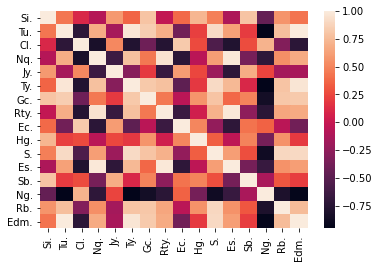

In [34]:
import seaborn as sns
sns.heatmap(df.corr())

In [0]:
df['Es.']=df['Es.'].shift(1)
df=df.dropna()
X = df.drop(columns=['Es.']).values

In [0]:
from sklearn.model_selection import KFold,train_test_split

In [0]:

#y = df['Es.'].values
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]


In [0]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    y_trains.append(y[train_index])
    y_tests.append(y[test_index])

In [0]:
from sklearn.metrics import mean_absolute_error

In [43]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  XGB.fit(X_trains[i],y_trains[i])
  XGB_error.append(mean_absolute_error(y_tests[i],XGB.predict(X_tests[i])))

Processing Batch :  1
[11:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  2
[11:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  3
[11:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  4
[11:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  5
[11:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  6
[11:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  7
[11:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [44]:
XGB_error

[27.2475409739012,
 33.10424156277064,
 124.65387991889796,
 124.5263354435804,
 75.71836112288901,
 51.06429708361901,
 151.2691008956344,
 90.46619641339338,
 53.256506460684314,
 179.26440599229602]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [46]:
pd.DataFrame({'True':y_test,'Predicted':XGB.predict(X_test)})

,True,Predicted
0,2075.00,2074.045410
1,2181.25,2175.984863
2,1867.75,1912.070068
3,1310.75,1292.984253
4,2033.75,2039.922852
...,...,...
428,1189.75,1171.380249
429,2021.75,2015.708618
430,1261.75,1259.311523
431,883.50,886.708130


In [47]:
XGB.score(X_test,y_test)

0.9886502731218911

In [48]:
df

,Si.,Tu.,Cl.,Nq.,Jy.,Ty.,Gc.,Rty.,Ec.,Hg.,S.,Es.,Sb.,Ng.,Rb.,Edm.
Date,,,,,,,,,,,,,,,,
11/26/2002,9.963,23763.0,109.98,1450.25,1.09720,60.500000,650.9,367.8,1.13025,1.0240,-73.50,868.75,17.81,24.419,-1.1947,94.0500
12/02/2002,9.955,23725.0,110.67,1492.75,1.07750,60.781250,650.7,377.5,1.13535,1.0515,-68.00,850.75,18.11,24.404,-1.1784,93.9950
12/03/2002,10.065,23727.0,111.38,1456.25,1.07710,60.703125,653.4,370.2,1.13385,1.0480,-82.00,874.50,18.24,24.539,-1.1484,93.9950
12/04/2002,10.090,23765.0,110.81,1432.75,1.07660,61.187500,655.3,366.8,1.13805,1.0480,-80.25,863.00,18.05,24.409,-1.1574,94.0250
12/05/2002,10.153,23775.0,110.72,1417.75,1.07470,61.625000,657.8,362.8,1.13885,1.0345,-84.50,858.25,17.97,24.546,-1.1644,94.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/03/2020,17.958,28238.0,37.29,9684.75,0.91945,138.187500,1704.8,1448.8,1.12640,2.4875,857.50,3077.00,11.62,1.821,1.1193,99.6900
06/04/2020,18.061,28241.0,37.41,9626.25,0.91785,137.796875,1727.4,1452.4,1.13755,2.4895,867.75,3117.75,11.73,1.822,1.1490,99.6900
06/05/2020,17.479,28227.0,39.55,9808.50,0.91370,137.093750,1683.0,1502.7,1.13190,2.5555,867.75,3110.50,12.02,1.782,1.2136,99.6875


In [0]:
df.to_csv('/content/drive/My Drive/mozam/featured.csv')

In [0]:
features=pd.read_csv('/content/drive/My Drive/mozam/featured.csv')

In [0]:
del features['Time']

In [0]:
feature=features.set_index('Date')

In [0]:
df=pd.concat([feature,df],join='inner',axis=1)

In [57]:
df

,Open,High,Low,Close,Vol,OI,BBL_5,BBM_5,BBU_5,rsi,vwap,STOCHFk_14,STOCHFd_3,STOCHk_5,STOCHd_3,super_trend,adx,fwma,willr,bias,Si.,Tu.,Cl.,Nq.,Jy.,Ty.,Gc.,Rty.,Ec.,Hg.,S.,Es.,Sb.,Ng.,Rb.,Edm.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/26/2002,869.25,871.75,850.00,868.75,523417,443316,844.927369,864.05,883.172631,32.570271,1000.813686,41.242938,68.075454,80.020317,81.061448,929.371752,18.438321,859.159091,-38.661710,0.011883,9.963,23763.0,109.98,1450.25,1.09720,60.500000,650.9,367.8,1.13025,1.0240,-73.50,868.75,17.81,24.419,-1.1947,94.0500
12/02/2002,873.25,894.50,866.00,875.25,653891,456523,847.619363,869.30,890.980637,63.196203,999.825091,55.056180,74.888794,69.645953,74.237757,948.912619,19.659946,871.641608,-23.529412,0.033559,9.955,23725.0,110.67,1492.75,1.07750,60.781250,650.7,377.5,1.13535,1.0515,-68.00,850.75,18.11,24.404,-1.1784,93.9950
12/03/2002,875.00,878.75,857.00,874.50,629913,432787,845.726240,868.15,890.573760,36.585341,999.292398,29.213483,54.599074,59.024561,67.812609,936.375113,19.716416,868.398601,-37.058824,0.018809,10.065,23727.0,111.38,1456.25,1.07710,60.703125,653.4,370.2,1.13385,1.0480,-82.00,874.50,18.24,24.539,-1.1484,93.9950
12/04/2002,862.50,865.00,848.00,863.00,758699,439560,852.714091,869.65,886.585909,29.015524,998.612590,22.043011,35.437558,55.184575,61.285030,924.166775,19.123896,864.582168,-48.986486,0.011950,10.090,23765.0,110.81,1432.75,1.07660,61.187500,655.3,366.8,1.13805,1.0480,-80.25,863.00,18.05,24.409,-1.1574,94.0250
12/05/2002,858.50,865.50,844.50,858.25,651673,433732,840.628041,863.75,886.871959,17.209019,998.015445,6.500000,19.252165,38.468047,50.892394,922.444547,18.331443,858.174825,-74.206349,-0.001653,10.153,23775.0,110.72,1417.75,1.07470,61.625000,657.8,362.8,1.13885,1.0345,-84.50,858.25,17.97,24.546,-1.1644,94.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/03/2020,3078.00,3129.50,3074.25,3077.00,1623708,3130318,3000.154650,3065.75,3131.345350,97.341111,1573.090974,91.454545,93.315556,89.683306,89.096146,2858.624712,16.034428,3077.277972,-3.182126,0.063468,17.958,28238.0,37.29,9684.75,0.91945,138.187500,1704.8,1448.8,1.12640,2.4875,857.50,3077.00,11.62,1.821,1.1193,99.6900
06/04/2020,3117.75,3126.75,3087.50,3117.75,2444330,3099946,3013.287324,3080.25,3147.212676,85.414898,1573.622925,86.181818,91.958083,90.319979,90.268788,2869.850916,17.079523,3090.290210,-5.937500,0.057620,18.061,28241.0,37.41,9626.25,0.91785,137.796875,1727.4,1452.4,1.13755,2.4895,867.75,3117.75,11.73,1.822,1.1490,99.6900
06/05/2020,3113.25,3210.50,3106.50,3110.50,2444330,3097301,3008.340320,3109.20,3210.059680,95.026996,1574.175175,88.271605,88.635990,90.880018,90.294434,2917.667539,18.959990,3127.807692,-6.588072,0.080075,17.479,28227.0,39.55,9808.50,0.91370,137.093750,1683.0,1502.7,1.13190,2.5555,867.75,3110.50,12.02,1.782,1.2136,99.6875


In [0]:
del df['Es.']

In [0]:
df['Close']=df['Close'].shift(1)
df=df.dropna()
X = df.drop(columns=['Close']).values
y = df.Close.values
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    y_trains.append(y[train_index])
    y_tests.append(y[test_index])

In [63]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  XGB.fit(X_trains[i],y_trains[i])
  XGB_error.append(mean_absolute_error(y_tests[i],XGB.predict(X_tests[i])))

Processing Batch :  1
[11:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  2
[11:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  3
[11:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  4
[11:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  5
[11:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  6
[11:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  7
[11:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [64]:
XGB_error

[7.5733394490653865,
 5.90778926999134,
 9.205683402046045,
 43.6279070213265,
 7.659727425167797,
 17.888087802463108,
 37.22189274540654,
 28.725412439416957,
 20.25991877803096,
 87.71761745876736]

In [65]:
XGB.fit(X_train,y_train)
XGB.score(X_test,y_test)

[11:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9986388168121741

In [0]:
from sklearn.model_selection import cross_validate

In [68]:
cross_validate(XGB,X,y,cv=10)

[11:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'fit_time': array([0.85893989, 0.8552382 , 0.86306167, 0.86125231, 0.85982347,
        0.8662281 , 0.85946059, 0.85717988, 0.85604072, 0.88655257]),
 'score_time': array([0.0022645 , 0.00217938, 0.00210547, 0.00195956, 0.00213647,
        0.00214744, 0.00235009, 0.00213695, 0.0020206 , 0.0020802 ]),
 'test_score': array([0.99088054, 0.95631867, 0.97292112, 0.8157922 , 0.98869401,
        0.9699065 , 0.87058657, 0.79981517, 0.9760628 , 0.51503499])}

In [69]:
df

,Open,High,Low,Close,Vol,OI,BBL_5,BBM_5,BBU_5,rsi,vwap,STOCHFk_14,STOCHFd_3,STOCHk_5,STOCHd_3,super_trend,adx,fwma,willr,bias,Si.,Tu.,Cl.,Nq.,Jy.,Ty.,Gc.,Rty.,Ec.,Hg.,S.,Sb.,Ng.,Rb.,Edm.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/02/2002,873.25,894.50,866.00,868.75,653891,456523,847.619363,869.30,890.980637,63.196203,999.825091,55.056180,74.888794,69.645953,74.237757,948.912619,19.659946,871.641608,-23.529412,0.033559,9.955,23725.0,110.67,1492.75,1.07750,60.781250,650.7,377.5,1.13535,1.0515,-68.00,18.11,24.404,-1.1784,93.9950
12/03/2002,875.00,878.75,857.00,875.25,629913,432787,845.726240,868.15,890.573760,36.585341,999.292398,29.213483,54.599074,59.024561,67.812609,936.375113,19.716416,868.398601,-37.058824,0.018809,10.065,23727.0,111.38,1456.25,1.07710,60.703125,653.4,370.2,1.13385,1.0480,-82.00,18.24,24.539,-1.1484,93.9950
12/04/2002,862.50,865.00,848.00,874.50,758699,439560,852.714091,869.65,886.585909,29.015524,998.612590,22.043011,35.437558,55.184575,61.285030,924.166775,19.123896,864.582168,-48.986486,0.011950,10.090,23765.0,110.81,1432.75,1.07660,61.187500,655.3,366.8,1.13805,1.0480,-80.25,18.05,24.409,-1.1574,94.0250
12/05/2002,858.50,865.50,844.50,863.00,651673,433732,840.628041,863.75,886.871959,17.209019,998.015445,6.500000,19.252165,38.468047,50.892394,922.444547,18.331443,858.174825,-74.206349,-0.001653,10.153,23775.0,110.72,1417.75,1.07470,61.625000,657.8,362.8,1.13885,1.0345,-84.50,17.97,24.546,-1.1644,94.0200
12/06/2002,849.00,855.25,831.00,858.25,726066,442948,838.832343,859.30,879.767657,36.567252,997.327890,34.645669,21.062893,29.491669,41.048097,910.822188,17.314662,856.104895,-65.354331,0.003439,10.163,23837.0,110.71,1428.75,1.08230,62.015625,659.3,364.5,1.14395,1.0355,-83.25,17.88,24.602,-1.1616,94.0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/03/2020,3078.00,3129.50,3074.25,3054.00,1623708,3130318,3000.154650,3065.75,3131.345350,97.341111,1573.090974,91.454545,93.315556,89.683306,89.096146,2858.624712,16.034428,3077.277972,-3.182126,0.063468,17.958,28238.0,37.29,9684.75,0.91945,138.187500,1704.8,1448.8,1.12640,2.4875,857.50,11.62,1.821,1.1193,99.6900
06/04/2020,3117.75,3126.75,3087.50,3077.00,2444330,3099946,3013.287324,3080.25,3147.212676,85.414898,1573.622925,86.181818,91.958083,90.319979,90.268788,2869.850916,17.079523,3090.290210,-5.937500,0.057620,18.061,28241.0,37.41,9626.25,0.91785,137.796875,1727.4,1452.4,1.13755,2.4895,867.75,11.73,1.822,1.1490,99.6900
06/05/2020,3113.25,3210.50,3106.50,3117.75,2444330,3097301,3008.340320,3109.20,3210.059680,95.026996,1574.175175,88.271605,88.635990,90.880018,90.294434,2917.667539,18.959990,3127.807692,-6.588072,0.080075,17.479,28227.0,39.55,9808.50,0.91370,137.093750,1683.0,1502.7,1.13190,2.5555,867.75,12.02,1.782,1.2136,99.6875


In [70]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Vol', 'OI', 'BBL_5', 'BBM_5', 'BBU_5',
       'rsi', 'vwap', 'STOCHFk_14', 'STOCHFd_3', 'STOCHk_5', 'STOCHd_3',
       'super_trend', 'adx', 'fwma', 'willr', 'bias', 'Si.', 'Tu.', 'Cl.',
       'Nq.', 'Jy.', 'Ty.', 'Gc.', 'Rty.', 'Ec.', 'Hg.', 'S.', 'Sb.', 'Ng.',
       'Rb.', 'Edm.'],
      dtype='object')

In [71]:
df['Rty.']=df['Rty.'].shift(1)
df=df.dropna()
X = df.drop(columns=['Rty.']).values
y = df['Rty.'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df['Close']=df['Close'].shift(-1)
df=df.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X = df.drop(columns=['Rty.']).values
y = df['Rty.'].values

In [75]:
cross_validate(XGB,X,y,cv=10)

[11:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'fit_time': array([0.89345026, 0.89588499, 0.86650944, 0.87173605, 0.86431551,
        0.88451576, 0.89372945, 0.87003136, 0.86898923, 0.86569142]),
 'score_time': array([0.00206399, 0.00226402, 0.00221276, 0.00200391, 0.00227952,
        0.00244498, 0.00241423, 0.00231528, 0.00230622, 0.00225616]),
 'test_score': array([-0.10100063,  0.71613226,  0.44038571,  0.75075917,  0.44899057,
         0.80769683, -0.67747173,  0.40109592,  0.42690181, -0.77011308])}

In [0]:
df['Gc.']=df['Gc.'].shift(1)
df=df.dropna()
X = df.drop(columns=['Gc.']).values
y = df['Gc.'].values

In [78]:
cross_validate(XGB,X,y,cv=10)

[11:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'fit_time': array([0.88702106, 0.88024735, 0.86508441, 0.86767292, 0.8985126 ,
        0.86850715, 0.86455774, 0.85981536, 0.8663125 , 0.86026812]),
 'score_time': array([0.00200462, 0.00225282, 0.0021975 , 0.00228262, 0.00250387,
        0.00254178, 0.00234962, 0.00222206, 0.00236249, 0.00219917]),
 'test_score': array([-4.16266723,  0.65627096,  0.56341704,  0.12627605,  0.3836171 ,
        -0.12233041,  0.45770636,  0.55640695,  0.18351844, -1.43156649])}

In [79]:
df

,Open,High,Low,Close,Vol,OI,BBL_5,BBM_5,BBU_5,rsi,vwap,STOCHFk_14,STOCHFd_3,STOCHk_5,STOCHd_3,super_trend,adx,fwma,willr,bias,Si.,Tu.,Cl.,Nq.,Jy.,Ty.,Gc.,Rty.,Ec.,Hg.,S.,Sb.,Ng.,Rb.,Edm.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12/04/2002,862.50,865.00,848.00,863.00,758699,439560,852.714091,869.65,886.585909,29.015524,998.612590,22.043011,35.437558,55.184575,61.285030,924.166775,19.123896,864.582168,-48.986486,0.011950,10.090,23765.0,110.81,1432.75,1.07660,61.187500,653.4,370.2,1.13805,1.0480,-80.25,18.05,24.409,-1.1574,94.0250
12/05/2002,858.50,865.50,844.50,858.25,651673,433732,840.628041,863.75,886.871959,17.209019,998.015445,6.500000,19.252165,38.468047,50.892394,922.444547,18.331443,858.174825,-74.206349,-0.001653,10.153,23775.0,110.72,1417.75,1.07470,61.625000,655.3,366.8,1.13885,1.0345,-84.50,17.97,24.546,-1.1644,94.0200
12/06/2002,849.00,855.25,831.00,847.75,726066,442948,838.832343,859.30,879.767657,36.567252,997.327890,34.645669,21.062893,29.491669,41.048097,910.822188,17.314662,856.104895,-65.354331,0.003439,10.163,23837.0,110.71,1428.75,1.08230,62.015625,657.8,362.8,1.14395,1.0355,-83.25,17.88,24.602,-1.1616,94.0600
12/09/2002,853.00,857.00,828.25,853.00,568754,445410,823.643869,850.15,876.656131,13.956741,996.763847,0.990099,14.045256,18.678452,28.879389,911.205655,16.535136,845.590909,-99.245283,-0.025265,10.128,23851.0,111.11,1376.75,1.08470,62.390625,659.3,364.5,1.14835,1.0250,-84.50,17.66,24.544,-1.1510,94.0600
12/10/2002,828.75,844.50,828.00,828.75,536345,444213,822.951586,845.80,868.648414,41.787447,996.235315,35.333333,23.656367,19.902422,22.690848,903.922052,15.826983,843.797203,-80.075188,-0.010719,10.136,23841.0,110.90,1392.75,1.08340,62.437500,658.7,354.0,1.14775,1.0315,-82.50,17.88,24.624,-1.1414,94.0750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/02/2020,3052.75,3079.00,3035.00,3054.00,1458830,3117655,3015.229485,3049.30,3083.370515,94.423478,1572.737658,98.237885,91.321176,90.803078,87.557723,2809.874697,14.908942,3051.215035,-0.627451,0.053004,18.260,28258.0,36.81,9647.75,0.92130,138.859375,1750.3,1404.5,1.11980,2.4910,850.50,11.22,1.777,1.1183,99.7025
06/03/2020,3078.00,3129.50,3074.25,3077.00,1623708,3130318,3000.154650,3065.75,3131.345350,97.341111,1573.090974,91.454545,93.315556,89.683306,89.096146,2858.624712,16.034428,3077.277972,-3.182126,0.063468,17.958,28238.0,37.29,9684.75,0.91945,138.187500,1734.0,1417.2,1.12640,2.4875,857.50,11.62,1.821,1.1193,99.6900
06/04/2020,3117.75,3126.75,3087.50,3117.75,2444330,3099946,3013.287324,3080.25,3147.212676,85.414898,1573.622925,86.181818,91.958083,90.319979,90.268788,2869.850916,17.079523,3090.290210,-5.937500,0.057620,18.061,28241.0,37.41,9626.25,0.91785,137.796875,1704.8,1448.8,1.13755,2.4895,867.75,11.73,1.822,1.1490,99.6900
